In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [68]:
dataset = pd.read_csv('sonar.all-data')
dataset

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [69]:
# to understand data
print(dataset.shape) #rows and cols
print(dataset.isnull().all().all()) #any null values
dataset.groupby('R').describe() # understand number of categoreies and their values

(207, 61)
False


0.0200                                                               0.0371  \
   count      mean       std     min      25%     50%      75%     max  count   
R                                                                               
M  111.0  0.034989  0.027074  0.0015  0.01795  0.0269  0.04185  0.1371  111.0   
R   96.0  0.022524  0.014762  0.0025  0.01220  0.0201  0.02915  0.0856   96.0   

             ...    0.0090         0.0032                                      \
       mean  ...       75%     max  count      mean       std     min     25%   
R            ...                                                                
M  0.045544  ...  0.011350  0.0364  111.0  0.006930  0.005958  0.0006  0.0031   
R  0.030232  ...  0.008675  0.0294   96.0  0.006053  0.003677  0.0011  0.0030   

                            
       50%     75%     max  
R                           
M  0.00530  0.0092  0.0439  
R  0.00545  0.0078  0.0180  

[2 rows x 480 columns]

In [70]:
# Splitting into X and y
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

# R and M to 1 and 0 respectively
le = LabelEncoder()
y = le.fit_transform(y)

# spltitting into train and test
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 4, criterion = 'entropy', max_depth=6, random_state = 0)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [72]:
y_pred = rf_classifier.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(acc_score)

0.8333333333333334


Parameters Tuning

n_estimators

In [73]:
acc_score = []
for i in range (1,200):
    rf_classifier = RandomForestClassifier(n_estimators = i, criterion = 'entropy', max_depth=6, random_state=0)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    acc_score.append(accuracy_score(y_test, y_pred))

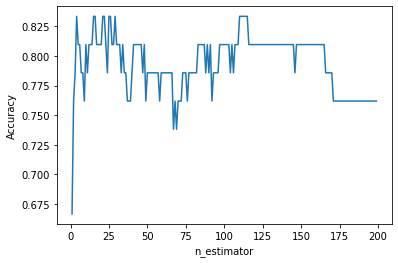

In [74]:
plt.plot(range(1, 200), acc_score)
plt.xlabel('n_estimator')
plt.ylabel('Accuracy')
plt.show()

In [75]:
max_acc_score = max(acc_score)
max_idx = acc_score.index(max_acc_score)
print('accuracy: ',max_acc_score)
print('n_estimators: ', max_idx + 1 )

accuracy:  0.8333333333333334
n_estimators:  4


Max depth parameter

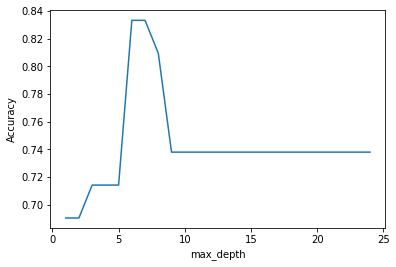

In [76]:
acc_score = []
for i in range(1, 25):
    rf_classifier = RandomForestClassifier(n_estimators = 4,criterion = 'entropy', max_depth=i, random_state=0)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    acc_score.append(accuracy_score(y_test, y_pred))

plt.plot(range(1, 25), acc_score)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()

In [77]:
max_acc_score = max(acc_score)
max_idx = acc_score.index(max_acc_score)
print('accuracy: ',max_acc_score)
print('max depth: ', max_idx + 1 )

accuracy:  0.8333333333333334
max depth:  6


So, accuracy was highest when 

max depth is 6

n_estimators is 4

criterion : entropy

# Decision Tree

In [78]:
#criterion with entropy
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [79]:
y_pred = dt_classifier.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(acc_score)

0.7619047619047619


In [80]:
#criterion with gini
dt_classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [81]:
y_pred = dt_classifier.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(acc_score)

0.6666666666666666


Better accuracy of 76.19% is with criterion using entropy

# Support Vector Machine

In [82]:
svm_classifier = SVC(kernel = 'linear', random_state = 0)
svm_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [83]:
y_pred = svm_classifier.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(acc_score)

0.8095238095238095


In [84]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for i in kernels:
    svm_classifier = SVC(kernel=i)
    svm_classifier.fit(X_train, y_train)
    y_pred = svm_classifier.predict(X_test)
    print(i, accuracy_score(y_test, y_pred))

linear 0.8095238095238095
poly 0.7857142857142857
rbf 0.7619047619047619
sigmoid 0.5476190476190477


So linear kernel here gives better accuracy

Finally out of RF, DT, and SVM best accuracy is given by RF.

RF: 83.3%

DT: 76.19%

SVM: 80.95%